In [1]:
# Download
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2025-03-26 16:52:46--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.60, 18.155.188.175, 18.155.188.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.1s    

2025-03-26 16:52:47 (1.82 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [3]:
seqs

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC',
 'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA',
 'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG',
 'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG

In [6]:
# The following code will also do the same task

def readFastq(filename):
    sequences, qualities = [], []
    with open(filename) as fh:
        for i, line in enumerate(fh):
            mod = i % 4
            if mod == 1:        # Sequence line
                sequences.append(line.rstrip())
            elif mod == 3:      # Quality line
                qualities.append(line.rstrip())
    return sequences, qualities

seqs, quals = readFastq('SRR835775_1.first1000.fastq')
seqs

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC',
 'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA',
 'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG',
 'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG

In [8]:
print(seqs[:2])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC']


In [41]:
len(seqs[0])

100

#### Convert a quality score character from Phred+33 encoding into its corresponding numerical quality score. In Phred+33 encoding, the quality score is stored as an ASCII character, and the numerical score is obtained by subtracting 33 from its ASCII code. For example, if qual is 'I' (which has an ASCII value of 73), the function returns 73 −33 = 40.

In [9]:
def phred33ToQ(qual):
    return ord(qual) - 33



In [10]:
phred33ToQ('#')

2

In [11]:
phred33ToQ('J')

41

In [12]:
phred33ToQ('I')

40

The function createHist below takes a list of quality score strings (each string represents the quality scores for a sequencing read in Phred+33 encoding) and computes a histogram of these scores. Here’s what it does step by step:

Histogram Initialization:
It creates a list hist with 50 zeros. This list will count how many times each quality score (from 0 to 49) appears.

Iterate Over Each Read:
For each quality string in the input list (qualityStrings), it processes every character in that string. Each character represents an encoded quality score.

Convert Character to Quality Score:
It calls the function phred33ToQ(phred) for each character. This function converts the ASCII character (Phred+33 encoded) into its corresponding numerical quality score by subtracting 33 from its ASCII code.

Update Histogram:
The computed numerical score q is then used as an index to increment the corresponding count in the histogram list (hist[q] += 1).

Return the Histogram:
After processing all reads and their quality scores, the function returns the hist list, which contains the frequency of each quality score from 0 to 49.

Finally, when you call h = createHist(quals) and print h, it displays the frequency distribution of the quality scores present in your dataset.

In summary, the function builds a histogram that shows how many times each quality score (0 through 49) occurs in the provided quality strings.

In [13]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
# An alternative method using itertools.chain

from itertools import chain

def createHist(qualityStrings):
    hist = [0] * 50
    # Flatten all quality strings into a single iterator of characters
    for ch in chain.from_iterable(qualityStrings):
        hist[ord(ch) - 33] += 1
    return hist

# Example usage:
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
# We could also do the following that generates the same outout

import numpy as np

def createHist(qualityStrings):
    # Convert each character in all reads to its ASCII value, subtract 33, and build a flat list
    ascii_values = [ord(ch) - 33 for read in qualityStrings for ch in read]
    # Use np.bincount to count occurrences, ensuring a fixed length histogram of 50
    hist = np.bincount(ascii_values, minlength=50)
    return hist.tolist()

# Example usage:
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


# Now make a plot

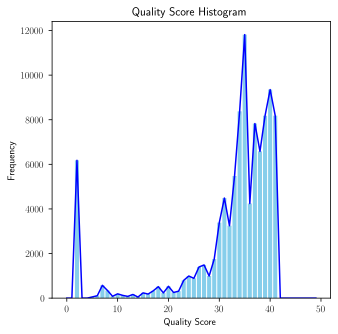

In [22]:
# Plot the histogram
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)
plt.figure(figsize=(5, 5))
plt.plot(range(len(h)), h, color='blue')
plt.bar(range(len(h)), h, color='skyblue')
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.title("Quality Score Histogram")
plt.show()

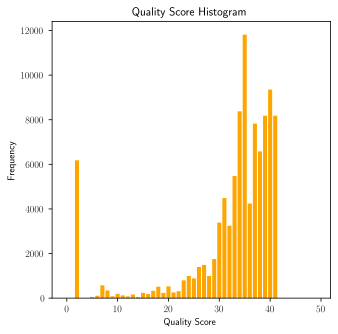

In [21]:
import matplotlib.pyplot as plt

# Assume `createHist` and `quals` are already defined
h = createHist(quals)

# Plot the histogram as a bar chart
plt.figure(figsize=(5, 5))
plt.bar(range(len(h)), h, color='orange')
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.title("Quality Score Histogram")
plt.show()

### The GC content, or, the fraction of the genome that contains G's or C's, that is something that is different from species to species. So different species will have different characteristic GC contents. So we want to check for that here!

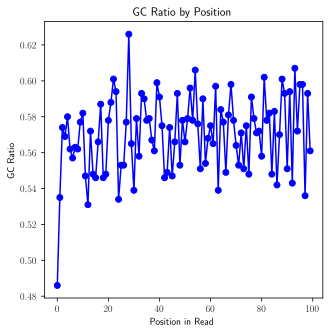

In [37]:
def findGCByPos(reads, length):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * length
    totals = [0] * length
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs, length=100)
plt.figure(figsize=(5, 5))
plt.plot(range(len(gc)), gc,'o-', color='blue')
plt.xlabel("Position in Read")
plt.ylabel("GC Ratio")
plt.title("GC Ratio by Position")
plt.show()

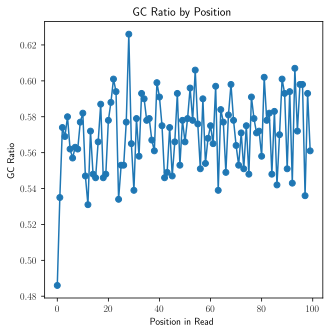

In [38]:
def findGCByPos(reads,length):
    ''' Find the GC ratio at each position in the read (assumed fixed length 100) '''
    gc = [0] * length
    totals = [0] * length
    for read in reads:
        for i, base in enumerate(read):
            totals[i] += 1
            if base in 'CG':
                gc[i] += 1
    # Compute ratios using a list comprehension
    return [g / tot if tot else 0 for g, tot in zip(gc, totals)]

gc = findGCByPos(seqs,length=100)

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(range(len(gc)), gc, marker='o')
plt.xlabel("Position in Read")
plt.ylabel("GC Ratio")
plt.title("GC Ratio by Position")
plt.show()


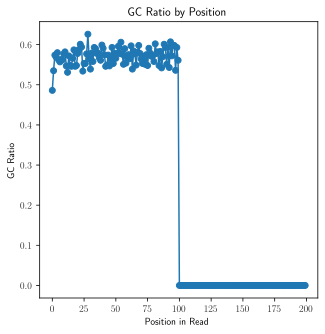

In [43]:
gc = findGCByPos(seqs,200)

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(range(len(gc)), gc, marker='o')
plt.xlabel("Position in Read")
plt.ylabel("GC Ratio")
plt.title("GC Ratio by Position")
plt.show()

In [44]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count



Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})

In [50]:
fraction_GC = (count['G'] + count['C'])/(count['G'] + count['C']+count['T'] + count['A'])
print("Fractional GC content = ", fraction_GC)

Fractional GC content =  0.5702426436758616
